# Prolexitim Detector (DProlex v3)
## Binary Classifiers (Alex / NoAlex) using classical and word vector techniques
### Dataset from Prolexitim TAS-20 Spain, Prolexitim NLP and Spanish 3Billion Word2Vec
<hr>
June 2019.<br> Prolexitim dataset version 1.2 (MPGS-TFM-Submission).<br> 
Raúl Arrabales Moreno (Psicobótica / Serendeepia Research)<br>
<a target="_blank" href="http://www.conscious-robots.com/">http://www.conscious-robots.com/</a> <br>
<hr>
Spanish Word Vectors from: <a taget="_blank" href="https://github.com/aitoralmeida/spanish_word2vec">Spanish 3B Pre-trained Word2Vec</a>

## Load Word Vectors and Documents (texts + labels)
- Word Vectors are obtained from the pre-trained Spanish 3B Word2Vec.
- Documents are obtained from the Prolexitim Pilot Study.
    - Text are narratives from Prolexitim NLP. 
    - Labels are categorical values from Prolexitim TAS-20.


### Loading the word vectors

In [1]:
from gensim.models import KeyedVectors

In [2]:
# My copy of Spanish 3 Billion Word2Vec
word_vectors = KeyedVectors.load('D:\Dropbox-Array2001\Dropbox\DataSets\Spanish Word2Vec\complete.kv', mmap='r')

In [3]:
# Testing Word Vectors for Spanish
word_vectors.most_similar("niño")

[('chiquillo', 0.863490104675293),
 ('bebé', 0.85056471824646),
 ('crío', 0.842483401298523),
 ('muchacho', 0.7765985727310181),
 ('niñito', 0.7588649988174438),
 ('chico', 0.75837242603302),
 ('cachorro', 0.7369438409805298),
 ('muchachito', 0.7227176427841187),
 ('gatito', 0.6718686819076538),
 ('hombre', 0.6658662557601929)]

In [4]:
# Testing Word Vectors for Spanish
word_vectors.get_vector("niño")

memmap([-9.8019737e-01,  3.7916845e-01, -1.6284896e+00,  7.4026036e-01,
         6.7275375e-01, -1.6113833e+00, -1.4873409e+00,  1.6933979e+00,
         3.0024448e-01,  6.1126029e-01, -1.7352545e+00,  2.5489315e-01,
        -7.4795651e-01,  1.0910559e+00, -2.1026888e+00, -4.4130564e+00,
         4.2894289e-01,  1.0395617e+00,  1.6460708e+00,  1.0484180e+00,
         1.4824442e+00,  1.6438122e+00, -2.7626188e+00,  9.5058024e-01,
         8.9740849e-01,  1.6531191e+00, -1.2386736e+00,  1.6032706e+00,
        -2.3379698e+00,  7.8928012e-01,  2.1672912e+00, -9.9437529e-01,
        -2.5328231e+00,  3.1492624e-01,  1.5492657e-01, -8.9571148e-02,
         3.7125247e+00, -1.0850103e+00, -1.0432119e+00, -2.8284986e+00,
        -2.1611533e+00,  3.6355894e+00, -2.8690529e+00, -1.6870648e-01,
        -4.2504200e-01,  2.8080521e+00,  4.1607413e+00,  2.0719736e+00,
        -9.5222074e-01,  1.1894293e+00,  1.0287092e+00, -2.3548654e-01,
        -1.3844434e+00,  2.4121676e-01,  9.0101380e-03,  1.02651

In [5]:
# Testing Word Vectors for Spanish
word_vectors.similar_by_vector(word_vectors.get_vector("niño") - word_vectors.get_vector("niña"))

[('individuo', 0.5064163208007812),
 ('hombre', 0.4954623878002167),
 ('muchacho', 0.4840112328529358),
 ('úrgalo', 0.47156092524528503),
 ('niño', 0.47056442499160767),
 ('hombredios', 0.46997901797294617),
 ('chiquillo', 0.4607599079608917),
 ('hom\xadbre', 0.46047237515449524),
 ('ejército…', 0.45903706550598145),
 ('gyorn', 0.44549915194511414)]

### Loading Prolexitim TAS-20 + NLP Dataset Load

In [6]:
import pandas as pd 

In [7]:
# My copy of Prolexitim join tables with TAS-20 categorical label and narratives from Prolexitim NLP
tasnlp_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-merged-1.3.csv"

In [8]:
docs_df = pd.read_csv(tasnlp_dataset_path,header=0,delimiter="\t")

In [9]:
# We're only intereted in the Spanish text and the corresponding Alexithymia label
docs_df = docs_df.dropna()
docs_df = docs_df[['Text', 'alex-a']]
docs_df.columns = ['Text', 'AlexLabel']
docs_df.sample(n=6)

,Text,AlexLabel
191,Érase una vez cuatro amigos que salieron a bai...,NoAlex
174,Un niño al que le obligaban a tocar un instrum...,NoAlex
24,Es una pareja y el hombre se encuentra arrepen...,NoAlex
56,Es gente que en una jornada laboral está desca...,PosAlex
167,un día de campo de q pasamos Todos mis amigos ...,NoAlex
102,"un niño que le gustaba mucho la música, en esp...",NoAlex


In [10]:
# We have a very unbalance dataset
docs_df.groupby(by='AlexLabel').count()

,Text
AlexLabel,
Alex,31
NoAlex,240
PosAlex,45


In [11]:
# And we decided to consider both Possible Alexithymia and Alexithymia as the same (Positive) class
docs_df['AlexLabel'] = docs_df['AlexLabel'].apply(lambda x: x.replace('PosAlex', 'Alex'))

In [12]:
docs_df.groupby(by='AlexLabel').count()

,Text
AlexLabel,
Alex,76
NoAlex,240


## Balancing training set

In [13]:
grouped = docs_df.groupby(by='AlexLabel')

In [21]:
balanced_df = pd.DataFrame(grouped.apply(lambda x: x.sample(grouped.size().min()).reset_index(drop=True)))

In [28]:
balanced_df = balanced_df.rename_axis(['AlexGroup', 'NoAlexGroup'])
balanced_df.groupby(by='AlexLabel').count()

,Text
AlexLabel,
Alex,76
NoAlex,76


In [29]:
balanced_df.count()

Text         152
AlexLabel    152
dtype: int64

In [31]:
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
balanced_df

,Text,AlexLabel
0,Este niño está frustrado porque tiene demasiad...,NoAlex
1,2 jóvenes aventureros querían recuperar el tes...,NoAlex
2,despertando después de hacer el amor con una b...,Alex
3,"Está la mujer dormida, su esposo se acaba de l...",NoAlex
4,"Era un niño que miraba muy triste el violín, q...",Alex
5,Esto es una historia muy bonita porque se han ...,NoAlex
6,"la ladera de una montaña, con algunas piedras ...",Alex
7,Cuatro colegas que pusieron una plantación en ...,NoAlex
8,La acababa de conocer en una discoteca y había...,Alex
9,Perezón de violín,NoAlex


## Prepare training data set
- X (independent variable) --> Text (narrative in Spanish)
- y (dependent variable) --> Alexithymia label (Alex/NoAlex)

In [32]:
import numpy as np

In [33]:
X = balanced_df['Text'].apply(lambda x: x.split())
y = balanced_df['AlexLabel']

X = np.array(X)
y = np.array(y)

In [34]:
print ("Number of examples: %s" % len(y))

Number of examples: 152


## Evaluation Metrics definition

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_auc_score

In [36]:
# Precision detecting the presencen of alexithymia
alex_precision_scorer = make_scorer(precision_score, pos_label='Alex')

# Precision detecting the absence of alexithymia
noalex_precision_scorer = make_scorer(precision_score, pos_label='NoAlex')

# sensitivity for the presence of alexithymia: recall, hit rate, or true positive rate (TPR).
alex_recall_scorer = make_scorer(recall_score, pos_label='Alex')

# sensitivity for the absence of alexithymia: recall, hit rate, or true positive rate (TPR).
noalex_recall_scorer = make_scorer(recall_score, pos_label='NoAlex')

# F1 Score the presence of alexithymia: harmonic mean of precision and sensitivity.
alex_f1_scorer = make_scorer(f1_score, pos_label='Alex')

# F1 Score the absence of alexithymia: harmonic mean of precision and sensitivity.
noalex_f1_scorer = make_scorer(f1_score, pos_label='NoAlex')

In [37]:
# A dataframe to store all evaluation results
col_names =  ['ModelName', 'ShortName', 'Accuracy', 'AUC', 'AlexPrecision', 'NoAlexPrecision', 'AlexRecall', 'NoAlexRecall', 'AlexF1', 'NoAlexF1']
eval_df  = pd.DataFrame(columns = col_names)
eval_df

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1


## Evaluation helper functions

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [39]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['Alex','NoAlex']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Classifier with Word Counts and Multinomial Naive Bayes
Multinomial Naive Bayes works with ocurrence counts, therefore we use here a feature vector with word counts for each document. 
- X: Vector with word counts.
- y: Alexithymia label.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [41]:
# Multinomial Naive Bayes using vectors with word counts
multinb_pipe = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])

In [42]:
cross_val_score(multinb_pipe, X, y, cv=10).mean()

0.5232142857142856

In [43]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [44]:
accuracy = scores['test_score'].mean()
accuracy

0.5232142857142856

In [45]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [46]:
auc = scores['test_score'].mean()
auc

0.5519132653061224

In [47]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)
# Warning messages appear due to no positive Alexithymia predicted samples

In [48]:
alex_prec = scores['test_score'].mean()
alex_prec

0.5986111111111111

In [49]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [50]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.5102747252747253

In [51]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [52]:
alex_recall = scores['test_score'].mean()
alex_recall

0.4035714285714286

In [53]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [54]:
noalex_recall = scores['test_score'].mean()
noalex_recall

0.6428571428571429

In [55]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

In [56]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.4392904154668861

In [57]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [58]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.558075569940895

Confusion matrix, without normalization
[[31 45]
 [27 49]]


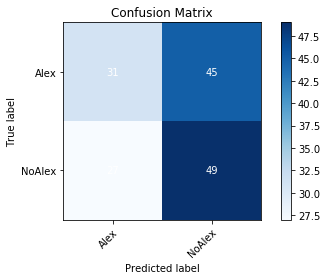

In [59]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(multinb_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

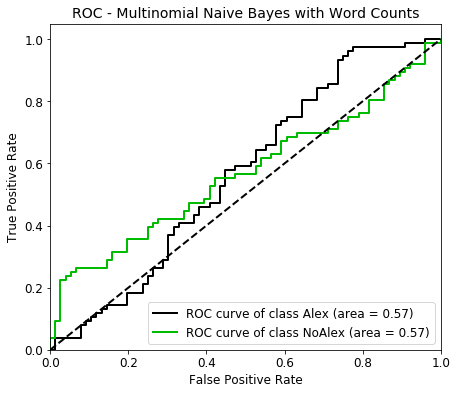

In [60]:
# ROC CURVE PLOT
import scikitplot as skplt
y_probas = cross_val_predict(multinb_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y, y_probas, title="ROC - Multinomial Naive Bayes with Word Counts",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [61]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Multinomial Naive Bayes with WC Vectors", "MultiNB",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [62]:
eval_df.tail()

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.523214,0.551913,0.598611,0.510275,0.403571,0.642857,0.43929,0.558076


## Classifier with Word Counts and Multivariate Bernoulli Naive Bayes
Multivariate Bernoulli works with discrete data (boolean flags), therefore we use here a feature vector with word counts for each document. 
- X: Vector with word counts.
- y: Alexithymia label.

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [64]:
# Multinomial Naive Bayes using vectors with word counts
bernnb_pipe = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("bernoulli nb", BernoulliNB())])

In [65]:
cross_val_score(bernnb_pipe, X, y, cv=10).mean()

0.5767857142857142

In [66]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [67]:
accuracy = scores['test_score'].mean()
accuracy

0.5767857142857142

In [68]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [69]:
auc = scores['test_score'].mean()
auc

0.5455357142857143

In [70]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)

In [71]:
alex_prec = scores['test_score'].mean()
alex_prec

0.5496470196470196

In [72]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.5466666666666666

In [74]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [75]:
alex_recall = scores['test_score'].mean()
alex_recall

0.9607142857142857

In [76]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [77]:
noalex_recall = scores['test_score'].mean()
noalex_recall

0.19285714285714284

In [78]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

In [79]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.6966749878649192

In [80]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [81]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.27320512820512816

Confusion matrix, without normalization
[[73  3]
 [61 15]]


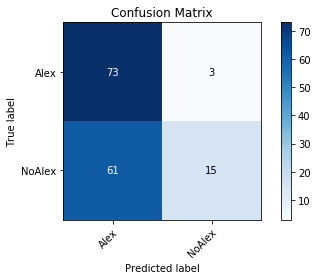

In [82]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(bernnb_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

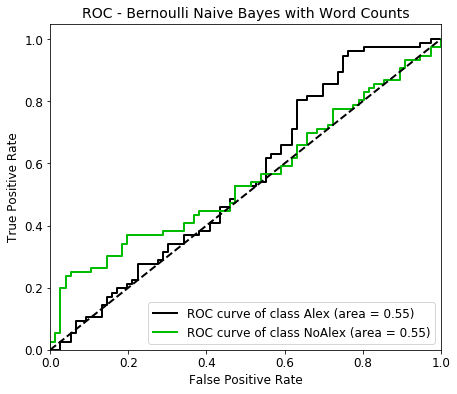

In [83]:
# ROC CURVE PLOT
import scikitplot as skplt
y_probas = cross_val_predict(bernnb_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y, y_probas, title="ROC - Bernoulli Naive Bayes with Word Counts",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [84]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Bernoulli Naive Bayes with Word Counts", "BernoulliNB",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [85]:
eval_df.tail()

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.523214,0.551913,0.598611,0.510275,0.403571,0.642857,0.439290,0.558076
1,Bernoulli Naive Bayes with Word Counts,BernoulliNB,0.576786,0.545536,0.549647,0.546667,0.960714,0.192857,0.696675,0.273205


## Classifier with TF/IDF and Multinomial Naive Bayes
Multinomial Naive Bayes works with ocurrence counts, therefore we use here a feature vector with Term Frequency (TF/IDF) for each document. 
- X: Vector with term frequency and inverse document frequency.
- y: Alexithymia label.

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [87]:
# Multinomial Naive Bayes using vectors with word counts
multinb_tfidf_pipe = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("multinomial nb tfidf", MultinomialNB())])

In [88]:
cross_val_score(multinb_tfidf_pipe, X, y, cv=10).mean()

0.48303571428571423

In [89]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [90]:
accuracy = scores['test_score'].mean()
accuracy

0.48303571428571423

In [91]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [92]:
auc = scores['test_score'].mean()
auc

0.5121492346938775

In [93]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
alex_prec = scores['test_score'].mean()
alex_prec

0.4076190476190476

In [95]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [96]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.48955461205461204

In [97]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [98]:
alex_recall = scores['test_score'].mean()
alex_recall

0.3607142857142857

In [99]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [100]:
noalex_recall = scores['test_score'].mean()
noalex_recall

0.6053571428571429

In [101]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [102]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.3718591865650689

In [103]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [104]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.5278357658853016

Confusion matrix, without normalization
[[28 48]
 [30 46]]


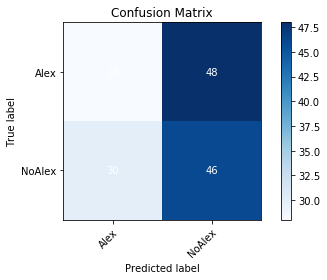

In [105]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(multinb_tfidf_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

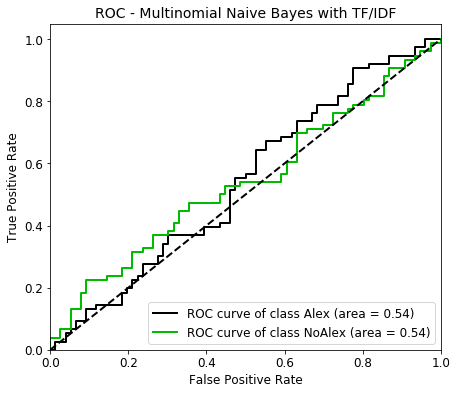

In [106]:
# ROC CURVE PLOT
import scikitplot as skplt
y_probas = cross_val_predict(multinb_tfidf_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y, y_probas, title="ROC - Multinomial Naive Bayes with TF/IDF",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [107]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Multinomial Naive Bayes with TF/IDF", "MultiNB-Tfidf",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [108]:
eval_df.tail()

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.523214,0.551913,0.598611,0.510275,0.403571,0.642857,0.439290,0.558076
1,Bernoulli Naive Bayes with Word Counts,BernoulliNB,0.576786,0.545536,0.549647,0.546667,0.960714,0.192857,0.696675,0.273205
2,Multinomial Naive Bayes with TF/IDF,MultiNB-Tfidf,0.483036,0.512149,0.407619,0.489555,0.360714,0.605357,0.371859,0.527836


## Classifier with TF/IDF and Multivariate Bernoulli Naive Bayes
Multivariate Bernoulli works with discrete data (boolean flags), therefore we use here a feature vector with TF/IDF for each document. 
- X: Vector with term frequencies.
- y: Alexithymia label.

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [110]:
bernnb_tfidf_pipe = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("bernoulli nb tfidf", BernoulliNB())])

In [111]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [112]:
accuracy = scores['test_score'].mean()
accuracy

0.5767857142857142

In [113]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [114]:
auc = scores['test_score'].mean()
auc

0.5455357142857143

In [115]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)

In [116]:
alex_prec = scores['test_score'].mean()
alex_prec

0.5496470196470196

In [117]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.5466666666666666

In [119]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [120]:
alex_recall = scores['test_score'].mean()
alex_recall

0.9607142857142857

In [121]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [122]:
noalex_recall = scores['test_score'].mean()
noalex_recall

0.19285714285714284

In [123]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

In [124]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.6966749878649192

In [125]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.27320512820512816

Confusion matrix, without normalization
[[73  3]
 [61 15]]


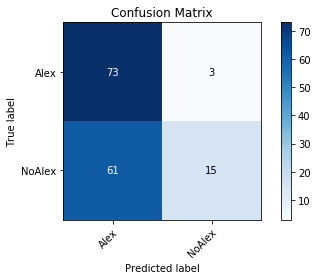

In [127]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(bernnb_tfidf_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

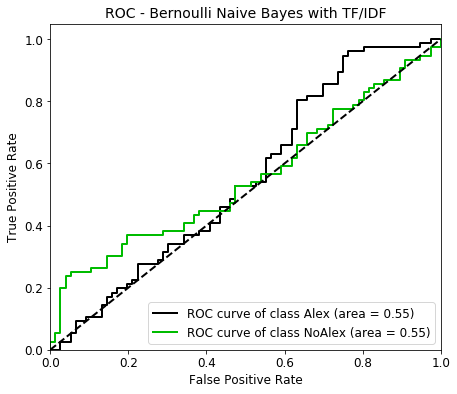

In [128]:
# ROC CURVE PLOT
import scikitplot as skplt
y_probas = cross_val_predict(bernnb_tfidf_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y, y_probas, title="ROC - Bernoulli Naive Bayes with TF/IDF",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [129]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Bernoulli Naive Bayes with TF/IDF", "BernoulliNBT-fidf",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [130]:
eval_df.tail()

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.523214,0.551913,0.598611,0.510275,0.403571,0.642857,0.439290,0.558076
1,Bernoulli Naive Bayes with Word Counts,BernoulliNB,0.576786,0.545536,0.549647,0.546667,0.960714,0.192857,0.696675,0.273205
2,Multinomial Naive Bayes with TF/IDF,MultiNB-Tfidf,0.483036,0.512149,0.407619,0.489555,0.360714,0.605357,0.371859,0.527836
3,Bernoulli Naive Bayes with TF/IDF,BernoulliNBT-fidf,0.576786,0.545536,0.549647,0.546667,0.960714,0.192857,0.696675,0.273205


## Classifier with Word Counts and Linear Support Vector Machine
C-Support Vector Classification (SVM) with word counts for each document. 
- X: Vector with word counts.
- y: Alexithymia label.

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [132]:
svc_pipe = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])

In [133]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [134]:
accuracy = scores['test_score'].mean()
accuracy

0.5276785714285714

In [135]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [136]:
auc = scores['test_score'].mean()
auc

0.514030612244898

In [137]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)

In [138]:
alex_prec = scores['test_score'].mean()
alex_prec

0.528931623931624

In [139]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [140]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.5167857142857143

In [141]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [142]:
alex_recall = scores['test_score'].mean()
alex_recall

0.55

In [143]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [144]:
noalex_recall = scores['test_score'].mean()
noalex_recall

0.5053571428571428

In [145]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

In [146]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.5300003917650976

In [147]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [148]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.4999376114081997

Confusion matrix, without normalization
[[42 34]
 [38 38]]


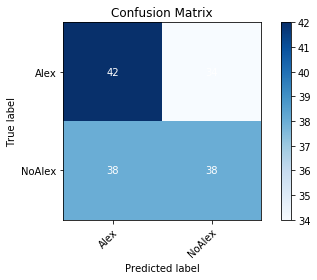

In [149]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(svc_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

In [150]:
# Get probas for SVC predictions
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

svm = SVC()
clf = CalibratedClassifierCV(svm)
vectorizer = CountVectorizer(analyzer=lambda x: x, binary=True)
Xtrainvecs = vectorizer.fit_transform(X_train)
clf.fit(Xtrainvecs, y_train)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

CalibratedClassifierCV(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
            cv='warn', method='sigmoid')

In [151]:
Xtestvecs = vectorizer.transform(X_test)
y_probas = clf.predict_proba(Xtestvecs)

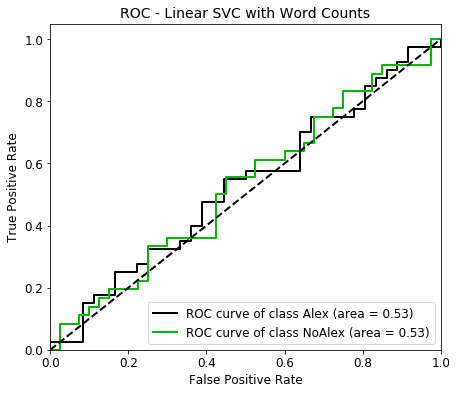

In [152]:
# ROC CURVE PLOT
import scikitplot as skplt
# y_probas = cross_val_predict(svc_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y_test, y_probas, title="ROC - Linear SVC with Word Counts",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [153]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Linear SVC with Word Counts", "SVC-wc",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [154]:
eval_df

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.523214,0.551913,0.598611,0.510275,0.403571,0.642857,0.439290,0.558076
1,Bernoulli Naive Bayes with Word Counts,BernoulliNB,0.576786,0.545536,0.549647,0.546667,0.960714,0.192857,0.696675,0.273205
2,Multinomial Naive Bayes with TF/IDF,MultiNB-Tfidf,0.483036,0.512149,0.407619,0.489555,0.360714,0.605357,0.371859,0.527836
3,Bernoulli Naive Bayes with TF/IDF,BernoulliNBT-fidf,0.576786,0.545536,0.549647,0.546667,0.960714,0.192857,0.696675,0.273205
4,Linear SVC with Word Counts,SVC-wc,0.527679,0.514031,0.528932,0.516786,0.550000,0.505357,0.530000,0.499938


## Classifier with TF/IDF and Linear Support Vector Machine
C-Support Vector Classification (SVM) with TF/IDF for each document. 
- X: Vector with term frequency.
- y: Alexithymia label.

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [156]:
svc_tfidf_pipe = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("linear svc tfidf", SVC(kernel="linear"))])

In [157]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [158]:
accuracy = scores['test_score'].mean()
accuracy

0.4794642857142858

In [159]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [160]:
auc = scores['test_score'].mean()
auc

0.4899234693877551

In [161]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)

In [162]:
alex_prec = scores['test_score'].mean()
alex_prec

0.4517094017094017

In [163]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [164]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.4504828504828505

In [165]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [166]:
alex_recall = scores['test_score'].mean()
alex_recall

0.4428571428571428

In [167]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [168]:
noalex_recall = scores['test_score'].mean()
noalex_recall

0.5160714285714285

In [169]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

In [170]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.43358262652380297

In [171]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [172]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.4662343023333735

Confusion matrix, without normalization
[[34 42]
 [37 39]]


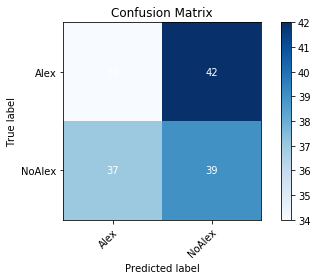

In [173]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(svc_tfidf_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

In [174]:
# Get probas for SVC predictions
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

svm = SVC()
clf = CalibratedClassifierCV(svm)
vectorizer = TfidfVectorizer(analyzer=lambda x: x, binary=True)
Xtrainvecs = vectorizer.fit_transform(X_train)
clf.fit(Xtrainvecs, y_train)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

CalibratedClassifierCV(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
            cv='warn', method='sigmoid')

In [175]:
Xtestvecs = vectorizer.transform(X_test)
y_probas = clf.predict_proba(Xtestvecs)

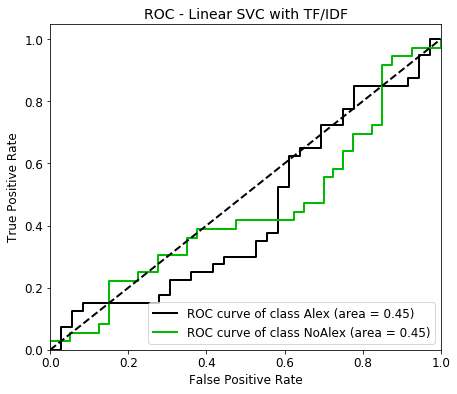

In [176]:
# ROC CURVE PLOT
import scikitplot as skplt
# y_probas = cross_val_predict(svc_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y_test, y_probas, title="ROC - Linear SVC with TF/IDF",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [177]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Linear SVC with TF/IDF", "SVC-wc-Tfidf",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [178]:
eval_df

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.523214,0.551913,0.598611,0.510275,0.403571,0.642857,0.439290,0.558076
1,Bernoulli Naive Bayes with Word Counts,BernoulliNB,0.576786,0.545536,0.549647,0.546667,0.960714,0.192857,0.696675,0.273205
2,Multinomial Naive Bayes with TF/IDF,MultiNB-Tfidf,0.483036,0.512149,0.407619,0.489555,0.360714,0.605357,0.371859,0.527836
3,Bernoulli Naive Bayes with TF/IDF,BernoulliNBT-fidf,0.576786,0.545536,0.549647,0.546667,0.960714,0.192857,0.696675,0.273205
4,Linear SVC with Word Counts,SVC-wc,0.527679,0.514031,0.528932,0.516786,0.550000,0.505357,0.530000,0.499938
5,Linear SVC with TF/IDF,SVC-wc-Tfidf,0.479464,0.489923,0.451709,0.450483,0.442857,0.516071,0.433583,0.466234


# Classifiers using Pre-trained Spanish Word Embeddings

## Vectorizers for documents (narratives)
Using existing word embeddings for Spanish we obtain a vector for each word. 
We also need to build a single vector representing the entire document, and for that we calculate the mean of all the word vectors in the document. 

In [179]:
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in word2vec_model.vocab]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return []

In [180]:
len(word_vectors.index2word)

1943871

In [181]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        if len(word2vec.index2word)>0:
            self.dim=len(word2vec.index2word)
        else:
            self.dim=0
            
    def fit(self, X, y):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec.vocab] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [182]:
word_vectors

In [183]:
from sklearn.ensemble import ExtraTreesClassifier

In [184]:
etree_w2v = Pipeline([("w2v vectorizer", MeanEmbeddingVectorizer(word_vectors)), 
                        ("extra trees", ExtraTreesClassifier(n_estimators=200))])

In [185]:
scores = cross_validate(etree_w2v, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [186]:
accuracy = scores['test_score'].mean()
accuracy

0.4946428571428571

In [187]:
scores = cross_validate(etree_w2v, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [188]:
auc = scores['test_score'].mean()
auc

0.4821428571428571

In [189]:
scores = cross_validate(etree_w2v, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [190]:
alex_prec = scores['test_score'].mean()
alex_prec

0.4459307359307359

In [191]:
scores = cross_validate(etree_w2v, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [192]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.4999819624819624

In [193]:
scores = cross_validate(etree_w2v, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [194]:
alex_recall = scores['test_score'].mean()
alex_recall

0.4875

In [195]:
scores = cross_validate(etree_w2v, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [196]:
noalex_recall = scores['test_score'].mean()
noalex_recall

0.4607142857142857

In [197]:
scores = cross_validate(etree_w2v, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

In [198]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.45229736637631374

In [199]:
scores = cross_validate(etree_w2v, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [200]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.4388009049773755

Confusion matrix, without normalization
[[41 35]
 [38 38]]


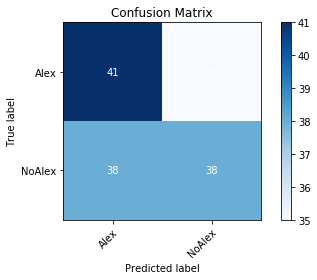

In [201]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(etree_w2v, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

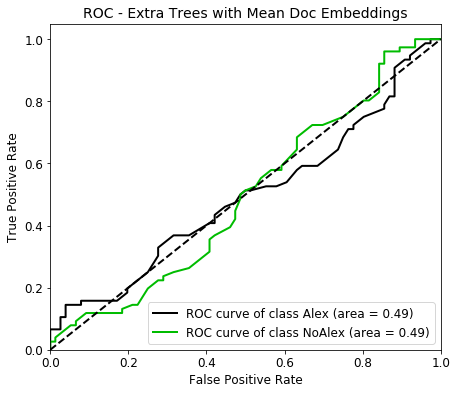

In [202]:
# ROC CURVE PLOT
import scikitplot as skplt
y_probas = cross_val_predict(etree_w2v, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y, y_probas, title="ROC - Extra Trees with Mean Doc Embeddings",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [203]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Extra Trees with Doc Mean Vectors", "Etree-W2V-Mean",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [204]:
eval_df

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.523214,0.551913,0.598611,0.510275,0.403571,0.642857,0.439290,0.558076
1,Bernoulli Naive Bayes with Word Counts,BernoulliNB,0.576786,0.545536,0.549647,0.546667,0.960714,0.192857,0.696675,0.273205
2,Multinomial Naive Bayes with TF/IDF,MultiNB-Tfidf,0.483036,0.512149,0.407619,0.489555,0.360714,0.605357,0.371859,0.527836
3,Bernoulli Naive Bayes with TF/IDF,BernoulliNBT-fidf,0.576786,0.545536,0.549647,0.546667,0.960714,0.192857,0.696675,0.273205
4,Linear SVC with Word Counts,SVC-wc,0.527679,0.514031,0.528932,0.516786,0.550000,0.505357,0.530000,0.499938
5,Linear SVC with TF/IDF,SVC-wc-Tfidf,0.479464,0.489923,0.451709,0.450483,0.442857,0.516071,0.433583,0.466234
6,Extra Trees with Doc Mean Vectors,Etree-W2V-Mean,0.494643,0.482143,0.445931,0.499982,0.487500,0.460714,0.452297,0.438801
